In [119]:
import requests
import requests_cache
import numpy as np
import pandas as pd
import lxml.html as lxl
import nltk
import re
from nltk.corpus import stopwords
from datetime import datetime

In [120]:
ds = pd.read_csv('data scientist.csv',index_col=False)

In [121]:
data_scientist.head()
# data_scientist.to_csv('data scientist.csv',encoding="utf-8")

,city,job_id,need_for_position,post_date,preferred_skill,salary_lower,salary_upper,state
0,Newton,BA-1277535,"- BS (min GPA 3.5) or MS or PhD in science, en...",02/23/2017,"Data Analytics, Informatics, Life Sciences . P...",100000,130000,MA
1,Sunnyvale,BF1-1327877,- Networking/Security - Experience with big d...,02/23/2017,"Python, C/C++, Networking, Security, Apache Sp...",150000,200000,CA
2,Mercer Island,RM2-1335019,More Than 3 Years of experience and knowledge ...,02/23/2017,"Big Data, Predictive Modeling, Algorithm Devel...",NA,NA,WA
3,Redwood City,AW2-1341356,Requirements: Bachelors in Computer Science or...,02/23/2017,"Machine Learning, Python, R, Mapreduce, Javasc...",140000,225000,CA
4,Portland,CS9-1346787,Experience and knowledge of: - Machine Learnin...,02/23/2017,"Machine Learning, Data Mining, Python, ETL BI,...",100000,120000,OR


In [6]:
import numpy as np
import nltk
import string
import unicodedata
from collections import Counter
from nltk.corpus import stopwords

# Skill set(DS)

In [102]:
ds_skill =",".join( data_scientist['preferred_skill'] ).lower()
ds_needForPosition ="".join( data_scientist['need_for_position']).lower()

In [103]:
def tokenize(text):
    s = text.lower()
    s = re.sub(r'/|\(|\)', ',', s.lower()).split(',')
    s = [i.strip() for i in s if i != '']
#     text = unicodedata.normalize('NFKD', s).encode('ascii','ignore')
#     text = text.translate(None, ",')(][].-\":")
#     text = nltk.word_tokenize(text)
    return s

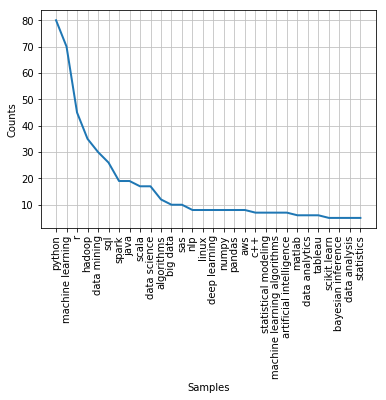

In [110]:
# skill set from prefered_skill ('sql' vs 'sql database', )
ds_filtered_skill = [word for word in tokenize(ds_skill) if word not in stopwords.words('english')] 
nltk.FreqDist(ds_filtered_skill).plot(30)

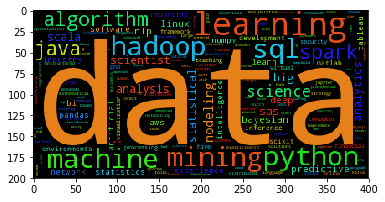

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color = 'black', max_font_size = 1000).generate(','.join(ds_filtered_skill))
plt.imshow(wordcloud)
plt.show()
# plt.axis("off")
# nltk.FreqDist(filtered_skill).most_common(10)

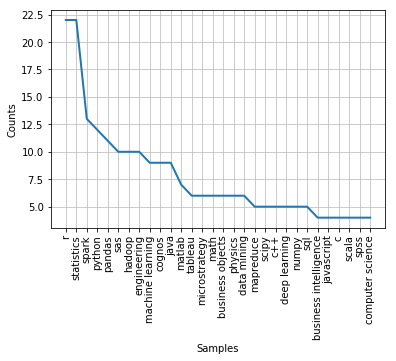

In [92]:
# skill from need_for_position
ds_filtered_needForPosition = [word for word in tokenize(ds_needForPosition) if word not in stopwords.words('english') and word not in ['etc.','e.g.']] 
nltk.FreqDist(ds_filtered_needForPosition).plot(30)
# nltk.FreqDist(filtered_needForPosition).keys()

In [90]:
# experience required (not excluding empty entry)
ds_needForPosition_list = list(data_scientist['need_for_position'])
ds_needForPosition_list_lower = list(data_scientist['need_for_position'].str.lower()) # all lower case
len([i for i in ds_needForPosition_list_lower if 'experi' in i]) / float(len(ds_needForPosition_list_lower))


0.9357798165137615

# Skill set (software engineering) 

In [86]:
sde = pd.read_csv('Software_Engineer.csv', index_col=False)
del sde['Unnamed: 0']
sde.head()

,city,job_id,need_for_position,post_date,preferred_skill,salary_lower,salary_upper,state
0,Lexington Park,SC4-1322959,- Bachelor's Degree or higher in Engineering o...,02/02/2017,"C#, SQL, Javascript, ASP.NET",100000.0,140000.0,MD
1,Jersey City,KB6-1330411,- Extensive hands-on technical experience in U...,01/26/2017,"Unix, IDE, Java/J2EE, Python, Linux, HTML5/CSS...",90000.0,120000.0,NJ
2,Richland,DN2-1338782,At Least 1 Year of experience and knowledge of...,01/27/2017,"C#, ASP.NET, SQL, Javascript, WPF and XAML",80000.0,110000.0,WA
3,New York City,JC6-1324151,Less Than 1 Year of experience and knowledge o...,02/16/2017,"Python, Ruby on Rails, Javascript",50000.0,140000.0,NY
4,West Hollywood,BC2-1331717,"- Experience with highly available, multi-tena...",02/15/2017,"JVM, C#, .NET, NoSQL, Git",90000.0,110000.0,CA


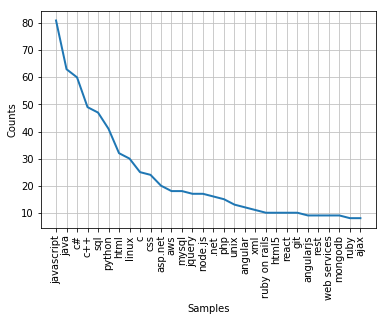

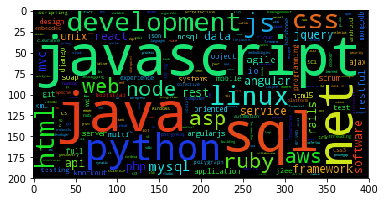

In [111]:
sde_skill =",".join( sde['preferred_skill'] ).lower()
sde_filtered_skill = [word for word in tokenize(sde_skill) if word not in stopwords.words('english')] 
nltk.FreqDist(sde_filtered_skill).plot(30)
wordcloud = WordCloud(background_color = 'black', max_font_size = 1000).generate(','.join(sde_filtered_skill))
plt.imshow(wordcloud)
plt.show()

In [114]:
# Two sets of words with intersection
ds_skill_words = nltk.FreqDist(ds_filtered_skill).most_common(20)
sde_skill_words = nltk.FreqDist(sde_filtered_skill).most_common(20)
print ds_skill_words
print sde_skill_words

[('python', 80), ('machine learning', 70), ('r', 45), ('hadoop', 35), ('data mining', 30), ('sql', 26), ('spark', 19), ('java', 19), ('scala', 17), ('data science', 17), ('algorithms', 12), ('big data', 10), ('sas', 10), ('nlp', 8), ('linux', 8), ('deep learning', 8), ('numpy', 8), ('pandas', 8), ('aws', 8), ('c++', 7)]
[('javascript', 81), ('java', 63), ('c#', 60), ('c++', 49), ('sql', 47), ('python', 41), ('html', 32), ('linux', 30), ('c', 25), ('css', 24), ('asp.net', 20), ('aws', 18), ('mysql', 18), ('jquery', 17), ('node.js', 17), ('.net', 16), ('php', 15), ('unix', 13), ('angular', 12), ('xml', 11)]


# Degree

21 53 48
('statist', 49)
('math', 37)
('computer science', 30)
('engineer', 22)
('biolog', 5)
('econ', 1)
('physics', 11)
('chemis', 2)
('bioinformati', 4)
('life science', 5)


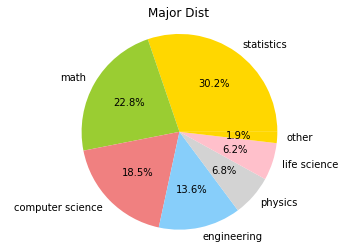

In [107]:
# degree_requirement

degree_level = ['Master', ' MS','M.S','Ph.D','PhD', 'BS','Bachelor']
degree_field = ['statist','math','computer science','engineer','biolog', 'econ','physics','chemis', 'bioinformati', 'life science']
# 'cs' contained in 'analytics', 'physics', 
bachelor_total = 0; master_total = 0; phd_total = 0;
for i in data_scientist['need_for_position']:
    master_total = master_total + sum( (x in i) for x in ['Master', 'MS','M.S'] ) # 'algorithms', 'systems','platforms'
    bachelor_total = bachelor_total + sum((x in i) for x in ['BS', 'Bachelor'])
    phd_total = phd_total + sum( (x in i) for x in ['PhD', 'Ph.D','phd','ph.d'])
print bachelor_total, master_total, phd_total

for k in degree_field:
    a = sum( k in x for x in needForPosition_list_lower)
    print (k, a)
field = [['statistics', 'math','computer science', 'engineering', 'physics','life science','other'], [49, 37, 30, 22, 11, 10, 3]]
plt.pie(field[1], labels = field[0], autopct='%1.1f%%',colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightgrey','pink'])
plt.axis('equal')
plt.title('Major Dist')
plt.show()